In [2]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#Reading the data
df=pd.read_csv('E:\\MP_FND\\DataFlair\\news.csv')
#Get shape and head
df.shape
df.head()

#Geting the labels
labels=df.label
labels.head()

#Spliting the dataset for testing amd training
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

#Initializing a TfidfVectorizer
#TfidfVectorizer:-It will transform the text into the feature vectors and used as input to the estimator.
#The vocabulary is the dictionary that will convert each token or word in the matrix and it will get the feature index.
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#Fiting and transforming train set, transforming test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

#Initializing a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

#Building confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

Accuracy: 92.82%


array([[590,  48],
       [ 43, 586]], dtype=int64)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression

# Set random seed (for reproducibility)
np.random.seed(1000)

nb_samples = 500
nb_features = 4

# Create the dataset
X, Y = make_regression(n_samples=nb_samples, 
                       n_features=nb_features)

# Implement a Passive Aggressive Regression
C = 0.01
eps = 0.1
w = np.zeros((X.shape[1], 1))
errors = []

for i in range(X.shape[0]):
    xi = X[i].reshape((X.shape[1], 1))
    yi = np.dot(w.T, xi)
    
    loss = max(0, np.abs(yi - Y[i]) - eps)
    
    tau = loss / (np.power(np.linalg.norm(xi, ord=2), 2) + (1 / (2*C)))
    
    coeff = tau * np.sign(Y[i] - yi)
    errors.append(np.abs(Y[i] - yi)[0, 0])
    
    w += coeff * xi
    
# Show the error plot
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(errors)
ax.set_xlabel('Time')
ax.set_ylabel('Error')
ax.set_title('Passive Aggressive Regression Absolute Error')
ax.grid()

plt.show()

<Figure size 1600x800 with 1 Axes>

In [3]:
import numpy as np

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Set random seed (for reproducibility)
np.random.seed(1000)

nb_samples = 5000
nb_features = 4

# Create the dataset
X, Y = make_classification(n_samples=nb_samples, 
                           n_features=nb_features, 
                           n_informative=nb_features - 2, 
                           n_redundant=0, 
                           n_repeated=0, 
                           n_classes=2, 
                           n_clusters_per_class=2)

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=1000)

# Perform a logistic regression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
print('Logistic Regression score: {}'.format(lr.score(X_test, Y_test)))

# Set the y=0 labels to -1
Y_train[Y_train==0] = -1
Y_test[Y_test==0] = -1

C = 0.01
w = np.zeros((nb_features, 1))

# Implement a Passive Aggressive Classification
for i in range(X_train.shape[0]):
    xi = X_train[i].reshape((nb_features, 1))
    
    loss = max(0, 1 - (Y_train[i] * np.dot(w.T, xi)))
    tau = loss / (np.power(np.linalg.norm(xi, ord=2), 2) + (1 / (2*C)))
    
    coeff = tau * Y_train[i]
    w += coeff * xi
    
# Compute accuracy
Y_pred = np.sign(np.dot(w.T, X_test.T))
c = np.count_nonzero(Y_pred - Y_test)

print('PA accuracy: {}'.format(1 - float(c) / X_test.shape[0]))

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression score: 0.884
PA accuracy: 0.884


In [2]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Set random seed (for reproducibility)
np.random.seed(1000)

nb_samples = 5000
nb_features = 4

In [4]:
from BeautifulSoup import BeautifulSoup
import urllib
import re

url = "Some Shopping Site"
html = urllib.urlopen(url).read()
soup = BeautifulSoup(html)
for a in soup.findAll('a',{'title':re.compile('.+') }):
    print(a.string)

ModuleNotFoundError: No module named 'BeautifulSoup'

In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
#Reading the data
df=pd.read_csv('E:\\MP_FND\\DataFlair\\news.csv')
#Get shape and head
df.shape
df.head()

#Geting the labels
labels=df.label
labels.head()

#Spliting the dataset for testing amd training
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

#Initializing a TfidfVectorizer
#TfidfVectorizer:-It will transform the text into the feature vectors and used as input to the estimator.
#The vocabulary is the dictionary that will convert each token or word in the matrix and it will get the feature index.
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#Fiting and transforming train set, transforming test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

#Initializing a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print("PassiveAgressiveClassifier")
print(f'Accuracy: {round(score*100,2)}%')

#Building confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

fig = df.hist(bins=15,
                 color='steelblue',
                 edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 xrot=45, yrot=0,
                 figsize=(10,9),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


PassiveAgressiveClassifier
Accuracy: 93.05%


NameError: name 'plt' is not defined

Automatically created module for IPython interactive environment


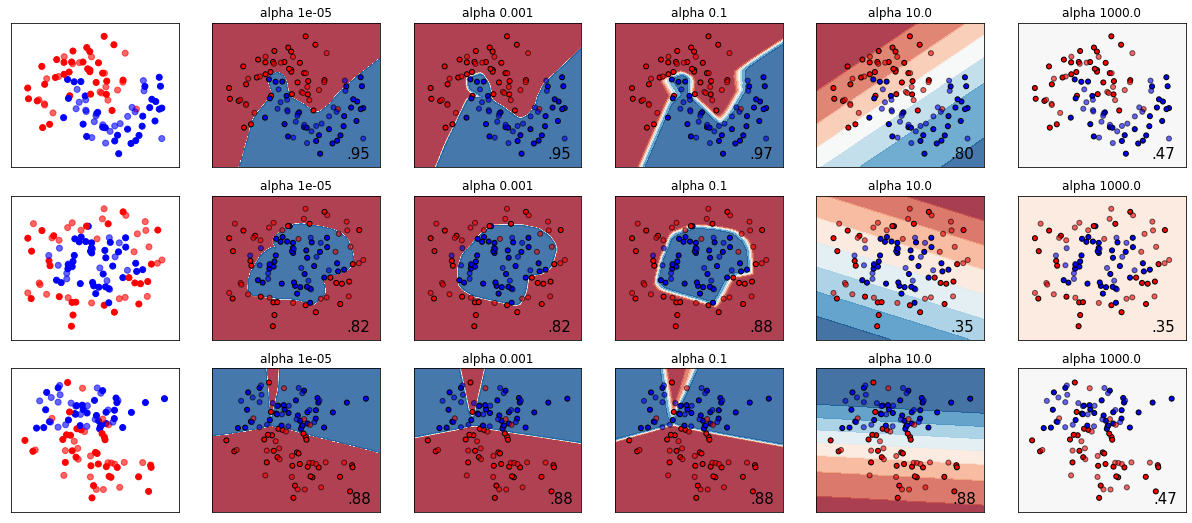

In [3]:
print(__doc__)


# Author: Issam H. Laradji
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

h = .02  # step size in the mesh

alphas = np.logspace(-5, 3, 5)
names = ['alpha ' + str(i) for i in alphas]

classifiers = []
for i in alphas:
    classifiers.append(MLPClassifier(solver='lbfgs', alpha=i, random_state=1,
                                     hidden_layer_sizes=[100, 100]))

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Wed Feb 27 11:19:02 2019

@author: DELL
"""

import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
#import pandas as pd

breast_cancer=pd.read_csv('E:\\MP_FND\\DataFlair\\news.csv')
# x=breast_cancer.data[0:199]
# y=breast_cancer.target[0:199]
# x1=breast_cancer.data[199:149]
# y1=breast_cancer.target[199:359]
x1_train,x1_test,y1_train,y1_test=train_test_split(breast_cancer.data,breast_cancer.target,test_size=0.3,random_state=42)
# data=([15,1,20,1,54,72])
classificationlin=linear_model.LinearRegression()
classificationnaive=GaussianNB()
classificationknn=KNeighborsClassifier()

classificationlin.fit(x1_train,y1_train)
classificationknn.fit(x1_train,y1_train)
classificationnaive.fit(x1_train,y1_train)

testlin=classificationlin.predict(x1_test)
testknn=classificationknn.predict(x1_test)
testnaive=classificationnaive.predict(x1_test)
a=['LinearRegression','=',classificationlin.score(x1_test,y1_test)]
b=['knn','=',classificationknn.score(x1_test,y1_test)]
c=['naivebayes','=',classificationnaive.score(x1_test,y1_test)]
#print(x)
str1='prediction accuracy using foloowing models is'
print(str1)
print(a)
print(b)
print(c)
print(x)

AttributeError: 'DataFrame' object has no attribute 'data'

In [2]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#Reading the data
df=pd.read_csv('E:\\MP_FND\\DataFlair\\news.csv')
type(df)
print(len(df))

6335
